In [1]:
import pandas as pd

In [6]:
df1=pd.read_csv("movies.csv")

In [7]:
df1.shape

(9742, 3)

In [8]:
df2=pd.read_csv("ratings.csv")
df2.shape

(100836, 4)

In [14]:
df2.sample(10)

,userId,movieId,rating,timestamp
18243,115,3114,5.0,948322663
44463,297,6,5.0,900871748
76103,479,2011,2.0,1039367502
14791,93,2054,4.0,942947102
57611,380,26585,4.0,1508436906
14221,91,551,5.0,1112711242
73906,474,2847,3.0,1088426723
43793,292,58293,3.0,1219624889
12891,82,5299,2.0,1084466631
61889,410,1171,4.0,990910479


In [16]:
df2['userId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [17]:
df2['userId'].nunique()

610

In [24]:
df1.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [155]:
df2['movieId'].value_counts().idxmax()

356

In [157]:
df2['movieId'].value_counts()

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: count, Length: 9724, dtype: int64

In [160]:
df1[df1['movieId']==356]

,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [31]:
df1[df1['title']=='Matrix, The (1999)']

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [33]:
df3=pd.read_csv("tags.csv")

In [35]:
df3[df3['movieId']==2571]

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


In [36]:
df2.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [37]:
df1[df1['title']=='Terminator 2: Judgment Day (1991)']

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [43]:
df2[df2['movieId']==589].rating.mean()

3.970982142857143

In [46]:
df1[df1['title']=='Fight Club (1999)']

,movieId,title,genres
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


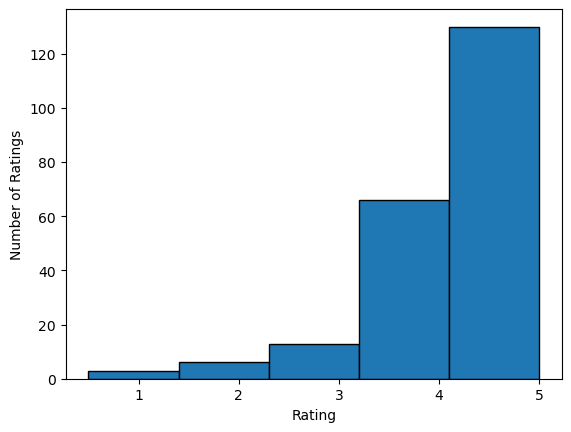

In [164]:
import matplotlib.pyplot as plt

ratings_for_movie = df2[df2['movieId'] == 2959]['rating']

plt.hist(ratings_for_movie, bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()


In [100]:
grouped_ratings = df2.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

result_df = pd.merge(df1, grouped_ratings, on='movieId', how='inner')

result_df_filtered = result_df[result_df['count'] > 50]

In [101]:
result_df_filtered.head()

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


In [102]:
result_df_filtered.shape

(436, 5)

In [103]:
result_df_filtered['mean'].max()

4.429022082018927

In [104]:
result_df_filtered[result_df_filtered['mean']==4.429022082018927]

,movieId,title,genres,count,mean
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022


In [165]:
movie_ratings_count = df2.groupby('movieId')['rating'].count().reset_index()

sorted_movies = movie_ratings_count.sort_values(by='rating', ascending=False)

top5_movies = sorted_movies.head(5)

top5_movies

,movieId,rating
314,356,329
277,318,317
257,296,307
510,593,279
1938,2571,278


In [166]:
result_df_filtered[result_df_filtered['movieId']==356]

,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134


In [167]:
result_df_filtered[result_df_filtered['movieId']==318]

,movieId,title,genres,count,mean
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022


In [168]:
result_df_filtered[result_df_filtered['movieId']==296]

,movieId,title,genres,count,mean
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068


In [169]:
result_df_filtered[result_df_filtered['movieId']==593]

,movieId,title,genres,count,mean
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.16129


In [106]:
result_df_filtered[result_df_filtered['movieId']==2571]

,movieId,title,genres,count,mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


In [107]:
result_df_filtered[result_df_filtered['title']=='Bad Boys (1995)']

,movieId,title,genres,count,mean
118,145,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller,51,3.245098


In [175]:
sci_fi_movies = result_df_filtered[result_df_filtered['genres'].str.contains('Sci-Fi')]
sorted_sci_fi_movies = sci_fi_movies.sort_values(by='count', ascending=False)
third_most_popular = sorted_sci_fi_movies.iloc[2]['title']

In [176]:
sorted_sci_fi_movies

,movieId,title,genres,count,mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640
...,...,...,...,...,...
8673,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54,3.833333
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
2028,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53,2.207547
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547


In [177]:
third_most_popular

'Jurassic Park (1993)'

In [114]:
links_df=pd.read_csv('links.csv')

In [115]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [125]:
result_df_filtered.head(400)

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
6341,49530,Blood Diamond (2006),Action|Adventure|Crime|Drama|Thriller|War,53,3.764151
6388,50872,Ratatouille (2007),Animation|Children|Drama,72,3.868056
6405,51255,Hot Fuzz (2007),Action|Comedy|Crime|Mystery,61,4.000000
6416,51662,300 (2007),Action|Fantasy|War|IMAX,80,3.681250


In [141]:
result_df_filtered['mean'].max()

4.429022082018927

In [142]:
result_df_filtered[result_df_filtered['mean']==4.429022082018927]

,movieId,title,genres,count,mean
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022


In [148]:
result_df_filtered[result_df_filtered['genres'].str.contains('Sci-Fi')]['mean'].max()

4.231075697211155

In [149]:
result_df_filtered[result_df_filtered['mean']==4.231075697211155]

,movieId,title,genres,count,mean
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076


In [150]:
result_df_filtered[result_df_filtered['title']=='Inception (2010)']

,movieId,title,genres,count,mean
7355,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143,4.066434


In [178]:
result_df_filtered[result_df_filtered['movieId']==79132]

,movieId,title,genres,count,mean
7355,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143,4.066434
